# 手写数字mnist可视化

In [87]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

In [2]:
mnist = input_data.read_data_sets('./MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

可视化数据

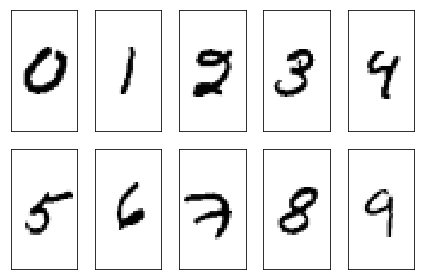

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=5,sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train[:,i]==1][0].reshape(28,28)
    ax[i].imshow(img,cmap='Greys',interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [30]:
x_train[y_train[:,0]==1].shape

(5444, 784)

## 构造两个重叠数字

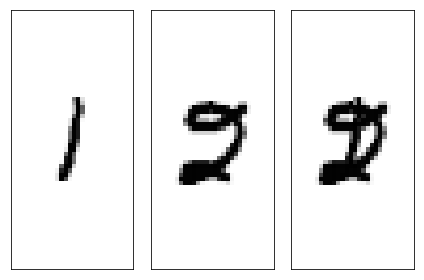

In [35]:
x1 = x_train[y_train[:,1]==1][0].reshape(28,28)
x2 = x_train[y_train[:,2]==1][0].reshape(28,28)
fig, ax = plt.subplots(nrows=1,ncols=3,sharex=True, sharey=True)
ax = ax.flatten()
ax[0].imshow(x1,cmap='Greys')
ax[1].imshow(x2,cmap='Greys')
#ax[2].imshow((x1+x2),cmap='Greys')
ax[2].imshow(np.maximum(x1,x2),cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [39]:
x_train = mnist.train.images
y_train = mnist.train.labels

In [40]:
x_train.shape

(55000, 784)

In [41]:
y_train.shape

(55000, 10)

In [49]:
x1 = x_train[y_train[:,1]==1]
x2 = x_train[y_train[:,2]==1]

In [50]:
x2.shape

(5470, 784)

In [51]:
from keras.datasets import mnist

Using TensorFlow backend.


In [52]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [53]:
x1 = x_train[y_train==1]

In [54]:
x1.shape

(6742, 28, 28)

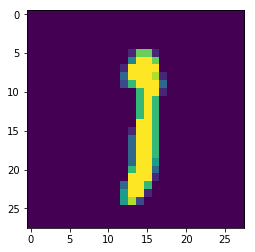

In [56]:
plt.imshow(x1[1111])
plt.show()

In [59]:
x2 = x_train[y_train==2]
x2.shape

(5958, 28, 28)

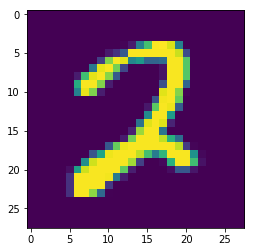

In [58]:
plt.imshow(x2[1111])
plt.show()

In [63]:
x12 = x_train[(y_train==1)|(y_train==2)]

In [64]:
x12.shape

(12700, 28, 28)

In [65]:
x_test1 = x_test[y_test==1]
x_test1.shape

(1135, 28, 28)

In [66]:
x_test2 = x_test[y_test==2]
x_test2.shape

(1032, 28, 28)

In [73]:
x_test1 = x_test[y_test==1]  ### (1135,28,28)
x_test2 = x_test[y_test==2]  ### (1032,28,28)
x_test12 = np.maximum(x_test1[:500],x_test2[:500])   ###  选取500个样本构造重叠数字
x_test1 = x_test1[500:]
x_test2 = x_test2[500:]

In [74]:
x_test1.shape

(635, 28, 28)

In [82]:
x_test2.shape

(532, 28, 28)

In [75]:
x_test12.shape

(500, 28, 28)

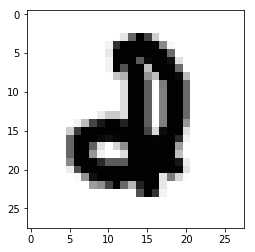

In [78]:
plt.imshow(x_test12[122],cmap='Greys')
plt.show()

In [80]:
x_test_new = np.concatenate([x_test1,x_test2,x_test12],axis=0)

In [81]:
x_test_new.shape

(1667, 28, 28)

In [83]:
a = np.ones(x_test1.shape[0])

In [84]:
a.shape

(635,)

In [85]:
y_test_new = np.concatenate([np.ones(x_test1.shape[0]),2*np.ones(x_test2.shape[0]), 
                             3*np.ones(x_test12.shape[0])],axis=0)

In [86]:
y_test_new.shape

(1667,)